In [1]:
from transformers import pipeline

pipe = pipeline("image-classification", model="nateraw/vit-age-classifier") 

c:\Users\ma907\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
c:\Users\ma907\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [2]:
import requests
from PIL import Image
from io import BytesIO
from transformers import ViTFeatureExtractor, ViTForImageClassification
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
data_files = {"validation": ["./Face-recognition/Dataset/validation/data-00000-of-00001.arrow"]}
my_dataset = load_dataset("arrow", data_files=data_files, split="validation")
df=my_dataset.to_pandas()
df.head()

,image,age,gender,race,service_test
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1,0,0,False
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,6,1,0,True
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,4,0,3,True
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3,1,5,True
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3,0,6,False


c:\Users\ma907\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\ma907\anaconda3\Lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


-------------------------
Image 1:
Predicted Age Group: 1
True Age Group: 1
-------------------------
-------------------------
Image 2:
Predicted Age Group: 3
True Age Group: 6
-------------------------
-------------------------
Image 3:
Predicted Age Group: 4
True Age Group: 4
-------------------------
-------------------------
Image 4:
Predicted Age Group: 3
True Age Group: 3
-------------------------
-------------------------
Image 5:
Predicted Age Group: 3
True Age Group: 3
-------------------------
-------------------------
Image 6:
Predicted Age Group: 4
True Age Group: 4
-------------------------
-------------------------
Image 7:
Predicted Age Group: 3
True Age Group: 3
-------------------------
-------------------------
Image 8:
Predicted Age Group: 1
True Age Group: 1
-------------------------
-------------------------
Image 9:
Predicted Age Group: 3
True Age Group: 3
-------------------------
-------------------------
Image 10:
Predicted Age Group: 1
True Age Group: 1
-----

ValueError: Image size of 1500x1369500 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1500x1.3695e+06 with 10956 Axes>

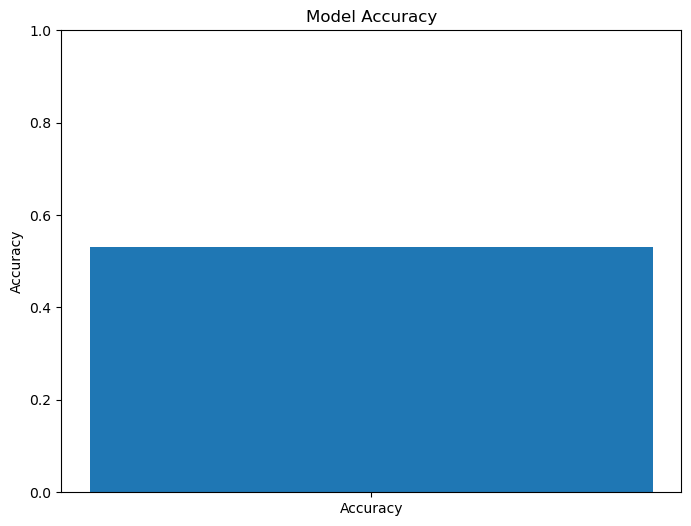

In [4]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

model = ViTForImageClassification.from_pretrained('nateraw/vit-age-classifier')
transforms = ViTFeatureExtractor.from_pretrained('nateraw/vit-age-classifier')

true_labels = []
predicted_labels = []
num_cols = 4  
num_rows = (len(df) + num_cols - 1) // num_cols

# Crear la figura y los subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.suptitle("Predicted vs True Age Groups", fontsize=16)

for index, (item, ax) in enumerate(zip(df["image"], axes.flatten())):
    if index >= len(df):
        ax.axis('off')
        continue

    image_bytes = item['bytes']
    im = Image.open(BytesIO(image_bytes))
    inputs = transforms(im, return_tensors='pt')
    output = model(**inputs)
    
    # Predicted Class probabilities
    proba = output.logits.softmax(1)

    # Predicted Classes
    pred = proba.argmax(1).item()
    predicted_labels.append(pred)
    
    true_label = df.iloc[index]["age"]  
    true_labels.append(true_label)
    
    # Display image and prediction
    #ax.imshow(im)
    #ax.set_title(f"Pred: {pred}\nTrue: {true_label}")
    #ax.axis('off')
    
    print("-------------------------")
    print(f"Image {index + 1}:")
    print(f"Predicted Age Group: {pred}")
    print(f"True Age Group: {true_label}")
    print("-------------------------")

#plt.tight_layout()
#plt.show()

accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

# Plot accuracy
plt.figure(figsize=(8, 6))
plt.bar(['Accuracy'], [accuracy])
plt.title('Model Accuracy')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.show()
    
    

In [12]:
df["predicted_labels"]=predicted_labels

df.head()
df.to_csv("results.csv")

In [6]:
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(classification_report(true_labels, predicted_labels))



Accuracy: 0.53
Precision: 0.52
Recall: 0.53
F1 Score: 0.52
              precision    recall  f1-score   support

           0       0.85      0.52      0.64       199
           1       0.72      0.80      0.76      1356
           2       0.41      0.45      0.43      1181
           3       0.56      0.73      0.64      3300
           4       0.42      0.38      0.40      2330
           5       0.45      0.26      0.33      1353
           6       0.48      0.37      0.42       796
           7       0.46      0.33      0.39       321
           8       0.65      0.30      0.41       118

    accuracy                           0.53     10954
   macro avg       0.56      0.46      0.49     10954
weighted avg       0.52      0.53      0.52     10954



In [16]:
result=classification_report(true_labels,predicted_labels, output_dict=True)
results=pd.DataFrame(result)
print(results)
results.to_csv("vit_age.csv")

                    0            1            2            3            4  \
precision    0.851240     0.723816     0.411810     0.564648     0.424891   
recall       0.517588     0.800147     0.454699     0.731818     0.375107   
f1-score     0.643750     0.760070     0.432193     0.637455     0.398450   
support    199.000000  1356.000000  1181.000000  3300.000000  2330.000000   

                     5           6           7           8  accuracy  \
precision     0.449809    0.476651    0.457265    0.648148  0.530035   
recall        0.261641    0.371859    0.333333    0.296610  0.530035   
f1-score      0.330841    0.417784    0.385586    0.406977  0.530035   
support    1353.000000  796.000000  321.000000  118.000000  0.530035   

              macro avg  weighted avg  
precision      0.556475      0.520526  
recall         0.460312      0.530035  
f1-score       0.490345      0.516081  
support    10954.000000  10954.000000  


<Figure size 1500x1000 with 0 Axes>

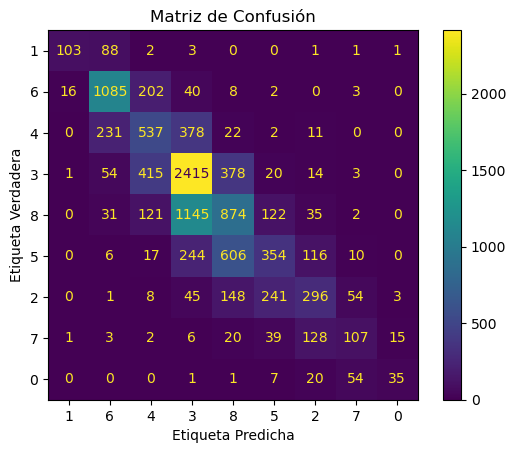

In [ ]:
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(15, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df["age"].unique())
disp.plot()
plt.title("Matriz de Confusión")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.show()